# Data exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [ ]:
dataset_file = "RFLFSODataFull.csv"
data = pd.read_csv(dataset_file)

In [ ]:
data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [ ]:
data.columns

Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')

In [ ]:
data.groupby("SYNOPCode").mean().T

SYNOPCode,0,3,4,5,6,7,8
FSO_Att,6.142325e+00,1.339935e+01,9.704639e+00,7.194128e+00,7.841017e+00,1.221939e+01,7.464775e+00
RFL_Att,1.052081e+01,1.038294e+01,1.233939e+01,1.159102e+01,1.410860e+01,1.249293e+01,1.161928e+01
AbsoluteHumidity,9.208323e+00,9.959274e+00,5.444132e+00,1.005394e+01,1.017272e+01,4.275455e+00,1.243971e+01
AbsoluteHumidityMax,9.670280e+00,1.043578e+01,5.730936e+00,1.056370e+01,1.068048e+01,4.482991e+00,1.305708e+01
AbsoluteHumidityMin,8.748230e+00,9.456170e+00,5.172751e+00,9.542402e+00,9.665169e+00,4.058095e+00,1.182797e+01
Distance,3.338916e+03,3.196260e+03,4.430427e+03,3.359967e+03,3.149666e+03,4.715645e+03,3.217786e+03
Frequency,7.849649e+10,7.831675e+10,7.852146e+10,7.853709e+10,7.849880e+10,7.841647e+10,7.852914e+10
Particulate,4.684161e-01,0.000000e+00,3.178427e+01,2.904048e+01,8.517780e+01,3.315245e+01,5.541164e+01
ParticulateMax,4.930194e-01,0.000000e+00,3.330110e+01,3.045756e+01,8.943806e+01,3.485126e+01,5.815213e+01
ParticulateMin,4.466829e-01,0.000000e+00,3.029331e+01,2.760204e+01,8.093038e+01,3.141431e+01,5.259326e+01


# Specific RF Model

In [ ]:
SYNOP_code_map = {
    0: 'clear',
    3: 'dust storm',
    4: 'fog',
    5: 'drizzle',
    6: 'rain',
    7: 'snow',
    8: 'showers'
}

# Initialize the results table
synop_codes = SYNOP_code_map.values()
result_table = pd.DataFrame(index=['fso_rmse', 'fso_r2', 'rfl_rmse', 'rfl_r2'], columns=synop_codes)

fso_features = ['Visibility', 'VisibilityMax', 'VisibilityMin', 'AbsoluteHumidity',
                'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Temperature',
                'TemperatureMax', 'TemperatureMin', 'WindSpeed',
                'WindSpeedMax', 'WindSpeedMin']
rfl_features = ['RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'Particulate',
               'ParticulateMax', 'ParticulateMin', 'Temperature',
               'TemperatureMax', 'TemperatureMin', 'WindSpeed',
               'WindSpeedMax', 'WindSpeedMin']

# Iterate over each SYNOP code
for code, weather in SYNOP_code_map.items():
    # Filter the data for the current SYNOP code
    synop_data = data[data['SYNOPCode'] == code]

    if synop_data.empty:
        continue  # Skip if no data for this SYNOP code

    # Split data into train and test sets (FSO)
    X_fso = synop_data[fso_features]
    y_fso = synop_data['FSO_Att']
    X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X_fso, y_fso, test_size=0.2, random_state=42)

    # Train Random Forest for FSO
    fso_model = RandomForestRegressor(oob_score=True, random_state=42)
    fso_model.fit(X_train_fso, y_train_fso)
    y_pred_fso = fso_model.predict(X_test_fso)

    # Calculate RMSE and R² for FSO
    fso_rmse = np.sqrt(mean_squared_error(y_test_fso, y_pred_fso))
    fso_r2 = r2_score(y_test_fso, y_pred_fso)

    # Store FSO results
    result_table.at['fso_rmse', weather] = fso_rmse
    result_table.at['fso_r2', weather] = fso_r2

    # Split data into train and test sets (RFL)
    X_rfl = synop_data[rfl_features]
    y_rfl = synop_data['RFL_Att']
    X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_rfl, y_rfl, test_size=0.2, random_state=42)

    # Train Random Forest for RFL
    rfl_model = RandomForestRegressor(oob_score=True, random_state=42)
    rfl_model.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = rfl_model.predict(X_test_rfl)

    # Calculate RMSE and R² for RFL
    rfl_rmse = np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl))
    rfl_r2 = r2_score(y_test_rfl, y_pred_rfl)

    # Store RFL results
    result_table.at['rfl_rmse', weather] = rfl_rmse
    result_table.at['rfl_r2', weather] = rfl_r2

In [ ]:
result_table

,clear,dust storm,fog,drizzle,rain,snow,showers
fso_rmse,1.545996,1.81895,0.836032,1.394207,1.528481,1.765324,1.089844
fso_r2,0.811718,0.962047,0.954767,0.84808,0.872038,0.883541,0.919428
rfl_rmse,1.873475,0.691237,0.770363,1.051537,1.325211,0.412944,1.381475
rfl_r2,0.465386,0.955709,0.791487,0.871558,0.888716,0.907848,0.77718


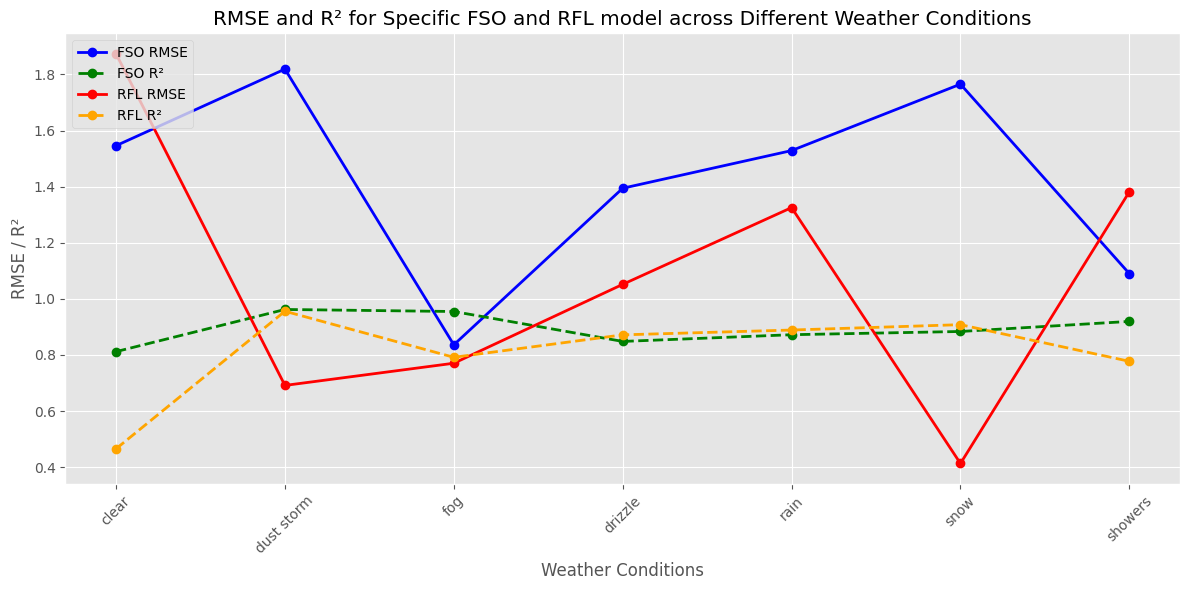

In [ ]:
def plot_results(result_table):
    conditions = result_table.columns.tolist()
    fso_rmse = result_table.loc['fso_rmse'].values
    fso_r2 = result_table.loc['fso_r2'].values
    rfl_rmse = result_table.loc['rfl_rmse'].values
    rfl_r2 = result_table.loc['rfl_r2'].values

    fig, ax1 = plt.subplots(figsize=(12, 6))
    x = np.arange(len(conditions))

    ax1.plot(x, fso_rmse, label='FSO RMSE', marker='o', color='blue', linestyle='-', linewidth=2)
    ax1.plot(x, fso_r2, label='FSO R²', marker='o', color='green', linestyle='--', linewidth=2)

    ax1.plot(x, rfl_rmse, label='RFL RMSE', marker='o', color='red', linestyle='-', linewidth=2)
    ax1.plot(x, rfl_r2, label='RFL R²', marker='o', color='orange', linestyle='--', linewidth=2)

    ax1.set_xlabel('Weather Conditions')
    ax1.set_ylabel('RMSE / R²')
    ax1.set_title('RMSE and R² for Specific FSO and RFL model across Different Weather Conditions')
    ax1.set_xticks(x)
    ax1.set_xticklabels(conditions, rotation=45)
    ax1.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_results(result_table)

# Generic RF Model

In [ ]:
data['SYNOPCode'] = data['SYNOPCode'].astype('category')

# Split the entire dataset
X = data[fso_features]
y_fso = data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.2, random_state=42)

X_rfl = data[rfl_features]
y_rfl = data['RFL_Att']
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_rfl, y_rfl, test_size=0.2, random_state=42)

generic_fso_model = RandomForestRegressor(oob_score=True, random_state=42)
generic_fso_model.fit(X_train_fso, y_train_fso)
y_pred_fso_generic = generic_fso_model.predict(X_test_fso)

fso_generic_rmse = np.sqrt(mean_squared_error(y_test_fso, y_pred_fso_generic))
fso_generic_r2 = r2_score(y_test_fso, y_pred_fso_generic)

generic_rfl_model = RandomForestRegressor(oob_score=True, random_state=42)
generic_rfl_model.fit(X_train_rfl, y_train_rfl)
y_pred_rfl_generic = generic_rfl_model.predict(X_test_rfl)

rfl_generic_rmse = np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl_generic))
rfl_generic_r2 = r2_score(y_test_rfl, y_pred_rfl_generic)

# Create a summary results table
generic_result_table = pd.DataFrame(index=['fso_rmse', 'fso_r2', 'rfl_rmse', 'rfl_r2'],
                                     columns=['generic_model'])
generic_result_table.at['fso_rmse', 'generic_model'] = fso_generic_rmse
generic_result_table.at['fso_r2', 'generic_model'] = fso_generic_r2
generic_result_table.at['rfl_rmse', 'generic_model'] = rfl_generic_rmse
generic_result_table.at['rfl_r2', 'generic_model'] = rfl_generic_r2

generic_result_table

,generic_model
fso_rmse,1.69406
fso_r2,0.808724
rfl_rmse,1.701258
rfl_r2,0.755675


# Feature importance

In [ ]:
def feature_removal_fso(data):

    S = data.drop(columns=['FSO_Att', 'RFL_Att']).columns.tolist()
    R = pd.DataFrame(columns=['Feature Removed', 'RMSE', 'R²'])

    while S:
        X = data[S]
        y = data['FSO_Att']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(oob_score=True, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        R = pd.concat([R, pd.DataFrame([{'Feature Removed': None, 'RMSE': rmse, 'R²': r2}])], ignore_index=True)

        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': S, 'Importance': importances})
        least_important_feature = feature_importance_df.loc[feature_importance_df['Importance'].idxmin()]
        R.iloc[-1, 0] = least_important_feature['Feature']
        S.remove(least_important_feature['Feature'])
    return R


def feature_removal_rfl(data):
    S = data.drop(columns=['FSO_Att', 'RFL_Att']).columns.tolist()
    R = pd.DataFrame(columns=['Feature Removed', 'RMSE', 'R²'])

    while S:
        X = data[S]
        y = data['RFL_Att']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(oob_score=True, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        R = pd.concat([R, pd.DataFrame([{'Feature Removed': None, 'RMSE': rmse, 'R²': r2}])], ignore_index=True)

        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': S, 'Importance': importances})
        least_important_feature = feature_importance_df.loc[feature_importance_df['Importance'].idxmin()]

        R.iloc[-1, 0] = least_important_feature['Feature']

        S.remove(least_important_feature['Feature'])
    return R


fso_results = feature_removal_fso(data)
rfl_results = feature_removal_rfl(data)

In [ ]:
# Sorting the results based on R² in descending order
fso_results_sorted = fso_results.sort_values(by='R²', ascending=False)
rfl_results_sorted = rfl_results.sort_values(by='R²', ascending=False)

# Print the sorted results
print("FSO Results Sorted by R²:")
print(fso_results_sorted)

print("\nRFL Results Sorted by R²:")
print(rfl_results_sorted)


FSO Results Sorted by R²:
          Feature Removed      RMSE        R²
8            WindSpeedMin  0.767423  0.960747
10           WindSpeedMax  0.774093  0.960062
5        RainIntensityMax  0.775390  0.959928
6               WindSpeed  0.776062  0.959858
7     AbsoluteHumidityMin  0.776950  0.959766
12                   Time  0.780095  0.959440
1        RainIntensityMin  0.780686  0.959379
9     AbsoluteHumidityMax  0.780970  0.959349
3           RainIntensity  0.781602  0.959283
2               SYNOPCode  0.781870  0.959255
11         ParticulateMax  0.782414  0.959199
4           WindDirection  0.784111  0.959021
0               Frequency  0.784453  0.958986
14  TemperatureDifference  0.915673  0.944117
13         TemperatureMax  0.921430  0.943412
18            Particulate  1.066919  0.924131
19       AbsoluteHumidity  1.071401  0.923492
15       RelativeHumidity  1.072529  0.923331
17         TemperatureMin  1.075344  0.922928
16          VisibilityMax  1.082886  0.921843
21      

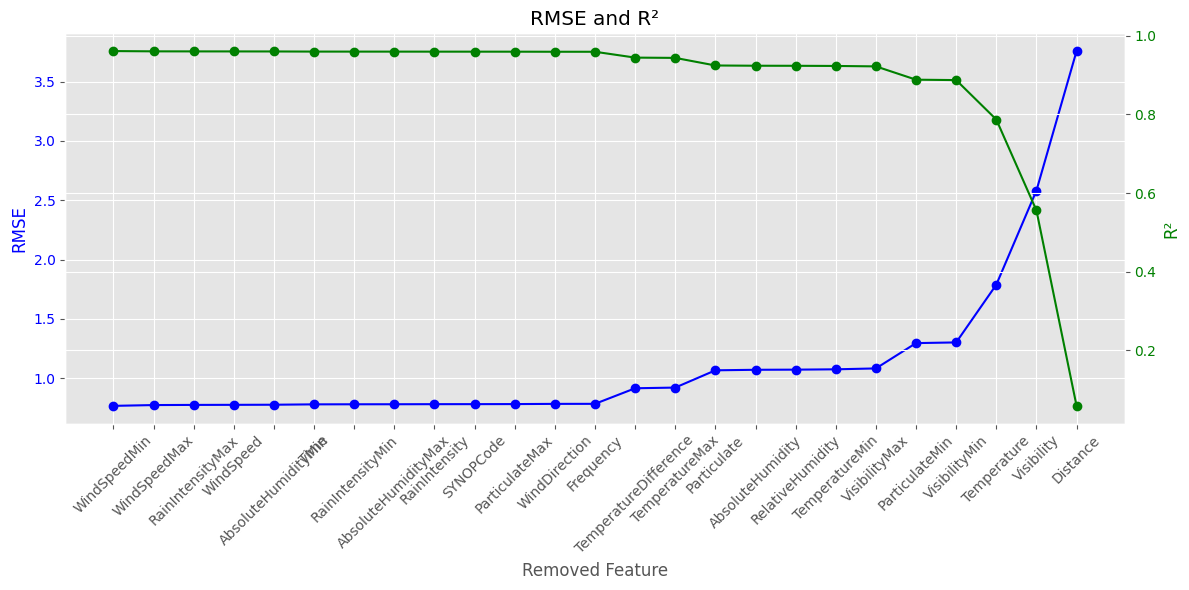

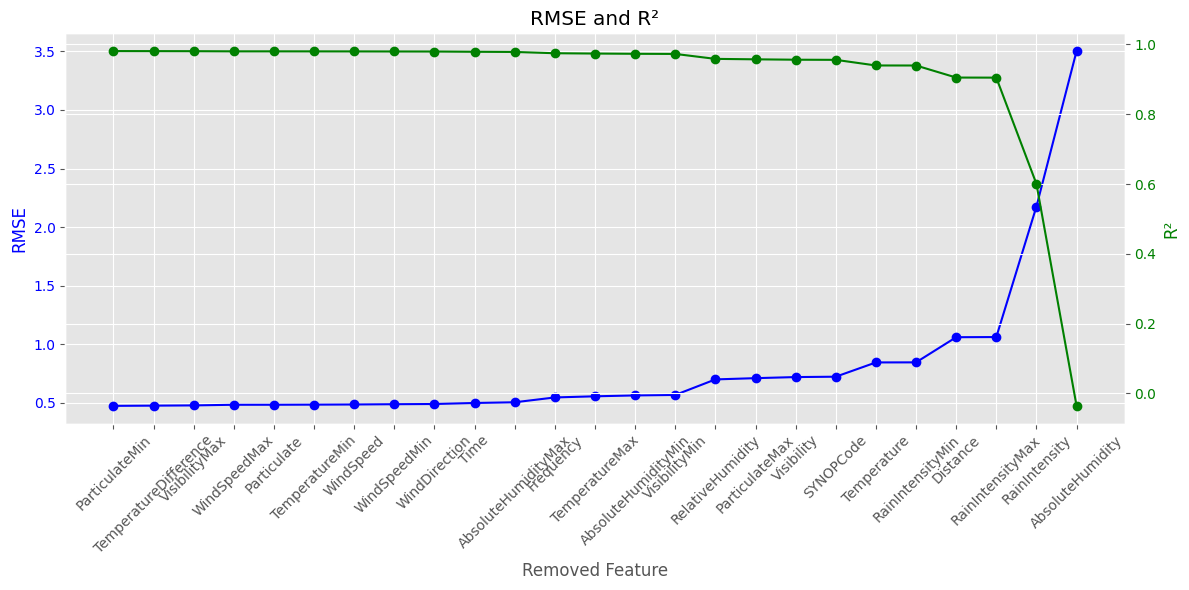

In [ ]:
def plot_rmse_r2(results_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Removed Feature')
    ax1.set_ylabel('RMSE', color='blue')
    ax1.plot(results_df['Feature Removed'], results_df['RMSE'], marker='o', color='blue', label='RMSE')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(results_df['Feature Removed'], rotation=45)

    ax2 = ax1.twinx()
    ax2.set_ylabel('R²', color='green')
    ax2.plot(results_df['Feature Removed'], results_df['R²'], marker='o', color='green', label='R²')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('RMSE and R²')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

plot_rmse_r2(fso_results_sorted)
plot_rmse_r2(rfl_results_sorted)

In [ ]:
# Select final features
selected_fso_features = fso_results[fso_results['R²'] < 0.95]['Feature Removed'].tolist()
selected_rfl_features = rfl_results[rfl_results['R²'] < 0.95]['Feature Removed'].tolist()

X_fso = data[fso_features]
y_fso = data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X_fso, y_fso, test_size=0.2, random_state=42)

X_rfl = data[rfl_features]
y_rfl = data['RFL_Att']
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_rfl, y_rfl, test_size=0.2, random_state=42)

final_fso_model = RandomForestRegressor(oob_score=True, random_state=42)
final_fso_model.fit(X_train_fso, y_train_fso)
y_pred_fso_final = final_fso_model.predict(X_test_fso)

fso_final_rmse = np.sqrt(mean_squared_error(y_test_fso, y_pred_fso_final))
fso_final_r2 = r2_score(y_test_fso, y_pred_fso_final)

final_rfl_model = RandomForestRegressor(oob_score=True, random_state=42)
final_rfl_model.fit(X_train_rfl, y_train_rfl)
y_pred_rfl_final = final_rfl_model.predict(X_test_rfl)

rfl_final_rmse = np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl_final))
rfl_final_r2 = r2_score(y_test_rfl, y_pred_rfl_final)

final_result_table = pd.DataFrame(index=['fso_rmse', 'fso_r2', 'rfl_rmse', 'rfl_r2'],
                                   columns=['final_model'])
final_result_table.at['fso_rmse', 'final_model'] = fso_final_rmse
final_result_table.at['fso_r2', 'final_model'] = fso_final_r2
final_result_table.at['rfl_rmse', 'final_model'] = rfl_final_rmse
final_result_table.at['rfl_r2', 'final_model'] = rfl_final_r2

final_result_table

,final_model
fso_rmse,1.69406
fso_r2,0.808724
rfl_rmse,1.701258
rfl_r2,0.755675
